# Kaggle Data Science Bowl - Predicting Heart Disease
##### Python 2.7

## Import Packages

In [21]:
# Dicom libraries
import dicom
import pylab

# Used for denoising
import cv2 
from matplotlib import pyplot as plt

## View Dicom Images ###

Some of the images come out clear, the image below of User 1, Sax 13, Image 1

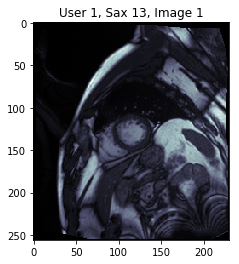

In [12]:
ds=dicom.read_file("/Users/1355800/Desktop/DSB/train/1/study/sax_13/IM-4565-0001.dcm")
pylab.imshow(ds.pixel_array, cmap=pylab.cm.bone)
pylab.title('User 1, Sax 13, Image 1')
pylab.show()
pylab.savefig('user1_sax13_img1.png')

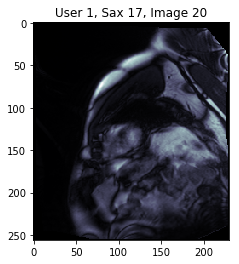

In [13]:
ds=dicom.read_file("/Users/1355800/Desktop/DSB/train/1/study/sax_17/IM-4569-0020.dcm")
pylab.imshow(ds.pixel_array, cmap=pylab.cm.bone)
pylab.title('User 1, Sax 17, Image 20')
pylab.show()

Some of the images are come out poorly, like this image from User 1, Sax 5, Image 1

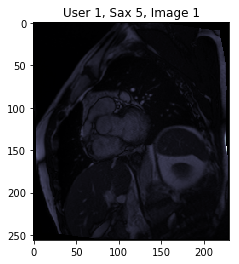

In [14]:
ds=dicom.read_file("/Users/1355800/Desktop/DSB/train/1/study/sax_5/IM-4557-0001.dcm")
pylab.imshow(ds.pixel_array, cmap=pylab.cm.bone)
pylab.title('User 1, Sax 5, Image 1')
pylab.show()

## View Dicom Metadata

In [15]:
ds

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'RETRO', 'NORM', 'DIS2D']
(0008, 0013) Instance Creation Time              TM: '143506.468000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.155926562610379287424879000432859632760
(0008, 0030) Study Time                          TM: '141855.484000'
(0008, 0031) Series Time                         TM: '143506'
(0008, 0032) Acquisition Time                    TM: '143456.972500'
(0008, 0060) Modality                            CS: 'MR'
(0008, 0070) Manufacturer                        LO: 'SIEMENS'
(0008, 103e) Series Description                  LO: 'sax'
(0008, 1090) Manufacturer's Model Name           LO: 'Aera'
(0008, 1140)  Referenced Image Sequence   3 item(s) ---- 
   (0008, 1150) Referenced SOP Class UID            UI: MR Image Storag

In [16]:
print(ds.PatientsSex)
print(ds.PatientsName)
print(ds.PatientsBirthDate)
print(ds.ImageType)
print(ds.BodyPartExamined)
print(ds.ImagePositionPatient)
print(ds.SliceLocation)

M
NDSB_1
19000101
['ORIGINAL', 'PRIMARY', 'M', 'RETRO', 'NORM', 'DIS2D']
HEART
['-6.1293118013072', '-115.2682035908', '209.36298825445']
-11.166474299894


## Denoising Techniques

In [34]:
img = cv2.imread('/Users/1355800/Desktop/DSB/user1_sax13_img1.png')

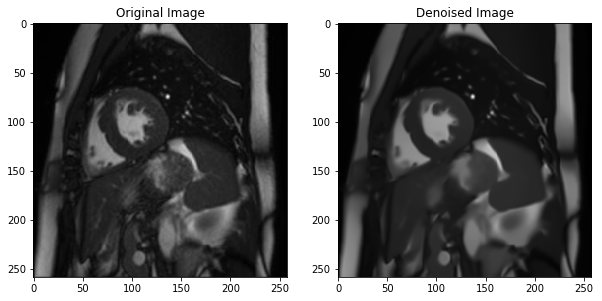

In [36]:
b,g,r = cv2.split(img)           # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb

# Denoising
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

b,g,r = cv2.split(dst)           # get b,g,r
rgb_dst = cv2.merge([r,g,b])     # switch it to rgb

#plt.subplot(211),plt.imshow(rgb_img)
#plt.subplot(212),plt.imshow(rgb_dst)
#plt.show()

f = plt.figure(figsize=(10, 10))
f.add_subplot(1,2, 1)
plt.imshow(rgb_img)
plt.title("Original Image")
f.add_subplot(1,2, 2)
plt.imshow(rgb_dst)
plt.title("Denoised Image")
plt.show(block=True)